# 使用多种机器学习算法训练并预测鸢尾花数据集

## 导入库

In [1]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# 加载并查看数据 

In [2]:
iris = load_iris()
iris


{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
data = iris.data
target = iris.target
target_names = iris.target_names
feature_name = iris.feature_names

In [4]:
data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [5]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
feature_name

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
data[:, 0]

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

## 对数据进行可视化并分析

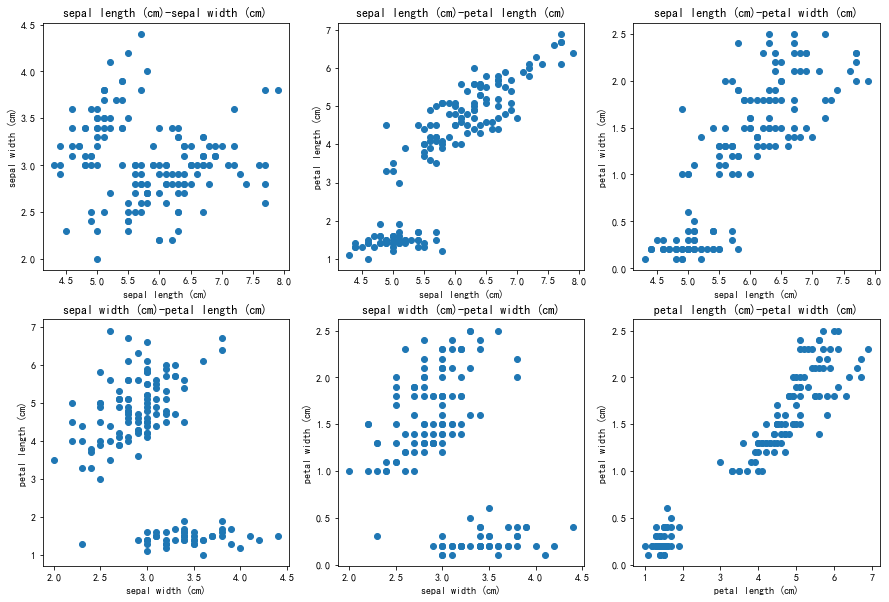

In [9]:
plt.figure(figsize=(15, 10))
plt.subplot(231)
plt.scatter(data[:, 0], data[:, 1])
plt.title(feature_name[0] + "-" + feature_name[1])
plt.xlabel(feature_name[0])
plt.ylabel(feature_name[1])

plt.subplot(232)
plt.scatter(data[:, 0], data[:, 2])
plt.title(feature_name[0] + "-" + feature_name[2])
plt.xlabel(feature_name[0])
plt.ylabel(feature_name[2])

plt.subplot(233)
plt.scatter(data[:, 0], data[:, 3])
plt.title(feature_name[0] + "-" + feature_name[3])
plt.xlabel(feature_name[0])
plt.ylabel(feature_name[3])

plt.subplot(234)
plt.scatter(data[:, 1], data[:, 2])
plt.title(feature_name[1] + "-" + feature_name[2])
plt.xlabel(feature_name[1])
plt.ylabel(feature_name[2])

plt.subplot(235)
plt.scatter(data[:, 1], data[:, 3])
plt.title(feature_name[1] + "-" + feature_name[3])
plt.xlabel(feature_name[1])
plt.ylabel(feature_name[3])

plt.subplot(236)
plt.scatter(data[:, 2], data[:, 3])
plt.title(feature_name[2] + "-" + feature_name[3])
plt.xlabel(feature_name[2])
plt.ylabel(feature_name[3])

plt.show()

由以上可视化可以看出: sepal length与petal length具有一定的相关性, sepal length与petal width具有一定的相关性, petal length与petal width相关性较大

## 查看特征之间的相关性矩阵

In [10]:
data = pd.DataFrame(data)

In [11]:

data.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
data.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
data.columns = feature_name

In [14]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
data.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


有以上相关系数矩阵可以发现: petal length和petal width具有很高的相关性,因此可以删除其中一个特征. 而petal length与sepal length也具有很高的相关性, 因此也删除掉其中一个, 所以可以删除sepal length和petal width两个特征

**获取删除sepal length和petal width两个特征后的数据集**

In [16]:
data1 = data.iloc[:, [1, 2]]
data1.head()

,sepal width (cm),petal length (cm)
0,3.5,1.4
1,3.0,1.4
2,3.2,1.3
3,3.1,1.5
4,3.6,1.4


## 对处理后的数据进行可视化

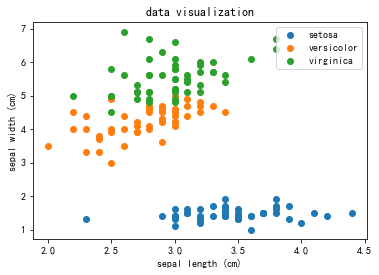

In [17]:
plt.scatter(data1.iloc[:, 0][target==0], data1.iloc[:, 1][target==0], label=target_names[0])
plt.scatter(data1.iloc[:, 0][target==1], data1.iloc[:, 1][target==1], label=target_names[1])
plt.scatter(data1.iloc[:, 0][target==2], data1.iloc[:, 1][target==2], label=target_names[2])
plt.xlabel(feature_name[0])
plt.ylabel(feature_name[1])
plt.legend()
plt.title('data visualization')
plt.show()

# 划分训练接和测试集

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data1, target,test_size=0.3, random_state=1)

In [19]:
X_train.head()

,sepal width (cm),petal length (cm)
118,2.6,6.9
18,3.8,1.7
4,3.6,1.4
45,3.0,1.4
59,2.7,3.9


In [20]:
X_test.head()

,sepal width (cm),petal length (cm)
14,4.0,1.2
98,2.5,3.0
75,3.0,4.4
16,3.9,1.3
131,3.8,6.4


In [21]:
len(X_train), len(X_test), len(y_train), len(y_test)

(105, 45, 105, 45)

# 使用逻辑回归进行训练预测

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [23]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [24]:
predict = lr.predict(X_test)
accuracy_score(y_test, predict)

0.9777777777777777

## 查看拟合的直线在数据中的位置

In [109]:
lr.coef_, lr.intercept_

(array([[ 0.68489087, -2.59180692],
        [-0.51332094, -0.23463827],
        [-0.17156993,  2.82644519]]),
 array([  7.22856868,   4.232646  , -11.46121468]))

In [120]:
x1_max = data1.iloc[:, 0].max()
x2_max = data1.iloc[:, 1].max()
x1_min = data1.iloc[:, 0].min()
x2_min = data1.iloc[:, 1].min()

In [121]:
x1, x2 = np.meshgrid(np.arange(x1_min-1, x1_max+1, 0.01),
                    np.arange(x2_min-1, x2_max+1, 0.01))

In [122]:
z = np.c_[x1.ravel(), x2.ravel()]

In [123]:
z.shape

(347600, 2)

In [114]:
predict_l = lr.predict(z)

In [137]:
def plt_data(x1, x2, predict):
    predict = predict.reshape(x1.shape)
    plt.contourf(x1, x2, predict, alpha=0.4, cmap=plt.cm.RdYlBu)
    plt.scatter(data1.iloc[:, 0][target==0], data1.iloc[:, 1][target==0], label=target_names[0])
    plt.scatter(data1.iloc[:, 0][target==1], data1.iloc[:, 1][target==1], label=target_names[1])
    plt.scatter(data1.iloc[:, 0][target==2], data1.iloc[:, 1][target==2], label=target_names[2])
    plt.xlabel(feature_name[1])
    plt.ylabel(feature_name[2])
    plt.legend()
    plt.title('data visualization')
    plt.show()

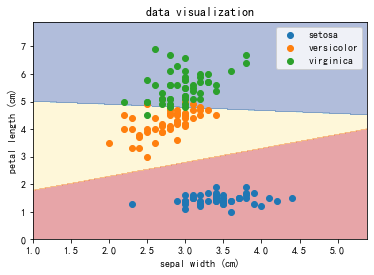

In [138]:
plt_data(x1, x2, predict_l)

# 使用knn算法进行训练预测`

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

**使用学习曲线选择参数k**

In [34]:
scores = []
for i in range(1, 20):
    knn = KNeighborsClassifier(i)
    score = cross_val_score(knn, data1, target, cv=10, scoring='accuracy').mean()
    scores.append(score)

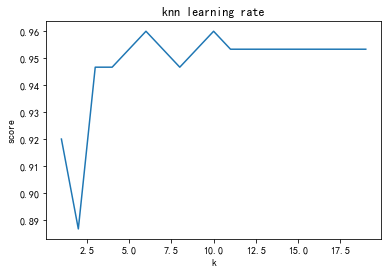

In [35]:
plt.plot([i for i in range(1, 20)], scores)
plt.xlabel('k')
plt.ylabel('score')
plt.title('knn learning rate')
plt.show()

In [36]:
max(scores), scores.index(max(scores))

(0.9600000000000002, 5)

由学习曲线可以看出, 当k为5的时候, 准确率最高为0.96

In [37]:
knn = KNeighborsClassifier(5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [38]:
predict = knn.predict(X_test)
accuracy_score(predict, y_test)

0.9555555555555556

In [139]:
knn_predict = knn.predict(z)

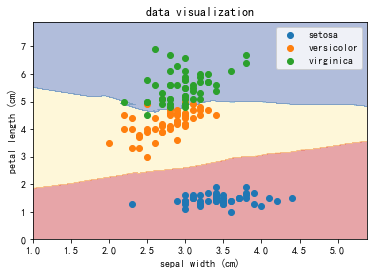

In [140]:
plt_data(x1, x2, knn_predict)

# 使用SVM训练并预测数据

In [202]:
from sklearn.svm import SVC

**对数据进行标准化处理**

In [203]:
from sklearn.preprocessing import StandardScaler

In [204]:
scaler = StandardScaler()
scaler.fit(data1)

StandardScaler()

In [205]:
data1_scaler = scaler.transform(data1)

In [208]:
X_train_scaler, X_test_scaler, y_scaler_train, y_scaler_test = train_test_split(data1_scaler, target, random_state=3)

In [209]:
svm = SVC()
svm.fit(X_train_scaler, y_scaler_train)

SVC()

In [210]:
predict = svm.predict(X_test_scaler)
accuracy_score(predict, y_scaler_test)

0.8947368421052632

In [211]:
x1_scaler_max = data1_scaler[:, 0].max()
x1_scaler_min = data1_scaler[:, 0].min()
x2_scaler_max = data1_scaler[:, 1].max()
x2_scaler_min = data1_scaler[:, 1].min()

In [212]:
x1_scaler, x2_scaler = np.meshgrid(np.arange(x1_scaler_min-1, x1_scaler_max+1, 0.01),
                                  np.arange(x2_scaler_min-1, x2_scaler_max+1, 0.01))
z_scaler = np.c_[x1_scaler.ravel(), x2_scaler.ravel()]

In [213]:
z_scaler.shape

(403608, 2)

In [217]:
predict_svm = svm.predict(z_scaler)
predict_svm = predict_svm.reshape(x1_scaler.shape)

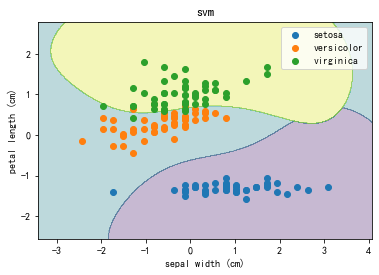

In [218]:
plt.contourf(x1_scaler, x2_scaler, predict_svm, alpha=0.3)
plt.scatter(data1_scaler[:, 0][target==0], data1_scaler[:, 1][target==0], label=target_names[0])
plt.scatter(data1_scaler[:, 0][target==1], data1_scaler[:, 1][target==1], label=target_names[1])
plt.scatter(data1_scaler[:, 0][target==2], data1_scaler[:, 1][target==2], label=target_names[2])
plt.xlabel(feature_name[1])
plt.ylabel(feature_name[2])
plt.legend()
plt.title('svm')
plt.show()

# 使用决策树进行预测

In [103]:
from sklearn.tree import DecisionTreeClassifier

**查看默认参数下决策树的预测效果**

In [104]:
tree = DecisionTreeClassifier()

In [105]:
tree.fit(X_train, y_train)
predict = tree.predict(X_test)
accuracy_score(predict, y_test)

0.9777777777777777

**对默认参数的决策树预测进行可视化**

In [141]:
tree_predict = tree.predict(z)


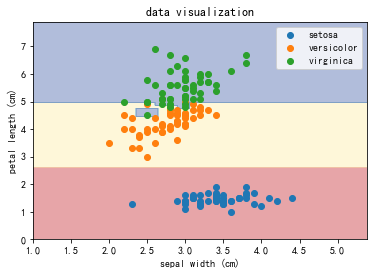

In [142]:
plt_data(x1, x2, tree_predict)

# 使用随机森林进行预测

In [129]:
from sklearn.ensemble import RandomForestClassifier

**使用默认参数进行预测**

In [130]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predict = rfc.predict(X_test)
accuracy_score(predict, y_test)

0.9555555555555556

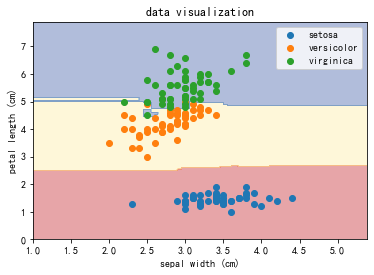

In [143]:
rfc_predict = rfc.predict(z)

plt_data(x1, x2, rfc_predict)
